# Kaggle courses

# Lesson: Data Visualization: From Non-Coder to Coder!


First of all upload the dataset "security-log.csv"



In [1]:
# Set up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [0]:
# Path of the file to read
sec_filepath = "/content/20190711_security-log.csv"
# header=none: insert the index at the top of the matrix
df = pd.read_csv(sec_filepath, sep=';', header=None)

In [0]:
def cut_string(x, char, pos=0):
    if type(x) == str:
        return x.split(char)[pos]
    else:
        return x

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,itime=1562794099,date=2019-07-10,time=23:28:18,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL_TLSv1.2,appcat=Network.Service,appid=41540,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL_TLSv1.2,""",policyid=3,proto=6,service=HTTPS,sessionid=165147,srcintf=wan1,srcip=192.168.52.2,srcport=60599,url=/
1,itime=1562794099,date=2019-07-10,time=23:28:18,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL,appcat=Network.Service,appid=15895,applist=default,apprisk=elevated,NaN,NaN,dstintf=wan1,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL,""",policyid=3,proto=6,service=HTTPS,sessionid=165147,srcintf=wifi,srcip=192.168.52.2,srcport=60599,url=/
2,itime=1562793794,date=2019-07-10,time=23:23:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=NTP,appcat=Network.Service,appid=16270,applist=default,apprisk=elevated,NaN,NaN,dstintf=wan1,dstip=17.253.54.125,NaN,dstport=123,eventtype=app-ctrl-all,NaN,level=information,logid=28704,logver=52,"msg=""Network.Service: NTP,""",policyid=3,proto=17,service=NTP,sessionid=164878,srcintf=wifi,srcip=192.168.52.2,srcport=55484,NaN
3,itime=1562793673,date=2019-07-10,time=23:21:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=iCloud,appcat=Storage.Backup,appid=29880,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Storage.Backup: iCloud,""",policyid=3,proto=6,service=HTTPS,sessionid=164786,srcintf=wan1,srcip=192.168.52.2,srcport=60598,url=/
4,itime=1562793673,date=2019-07-10,time=23:21:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL_TLSv1.2,appcat=Network.Service,appid=41540,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL_TLSv1.2,""",policyid=3,proto=6,service=HTTPS,sessionid=164786,srcintf=wan1,srcip=192.168.52.2,srcport=60598,url=/


In [5]:
columns=[]
#columns=list()
for col in df.columns:
  print(col)
#  print(df.index)
#  print(df.loc[:10].index)
  series=df[col].copy()
#  series=df.loc[:10,col].copy()
#  print(series)
  for row in df.index:
#  for row in df.loc[:10].index:
#    print(row)
    series[row]=cut_string(df.loc[row,col],'=',0)
  series.dropna(inplace=True)
  list_cols=series.unique()
  print(list_cols)
  if len(list_cols) > 0:
    columns.append(list_cols[0])
  else:
    columns.append(f'hidden_{col}')
print(columns)
df.colums=columns

0
['itime']
1
['date']
2
['time']
3
['devid']
4
['vd']
5
['type']
6
['subtype']
7
['action']
8
['app']
9
['appcat']
10
['appid']
11
['applist']
12
['apprisk']
13
['crlevel']
14
['crscore']
15
['dstintf']
16
['dstip']
17
['dstname']
18
['dstport']
19
['eventtype']
20
['hostname']
21
['level']
22
['logid']
23
['logver']
24
['msg']
25
['policyid']
26
['proto']
27
['service']
28
['sessionid']
29
['srcintf']
30
['srcip']
31
['srcport']
32
['url']
['itime', 'date', 'time', 'devid', 'vd', 'type', 'subtype', 'action', 'app', 'appcat', 'appid', 'applist', 'apprisk', 'crlevel', 'crscore', 'dstintf', 'dstip', 'dstname', 'dstport', 'eventtype', 'hostname', 'level', 'logid', 'logver', 'msg', 'policyid', 'proto', 'service', 'sessionid', 'srcintf', 'srcip', 'srcport', 'url']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [0]:
df.columns=columns
df = df.applymap(lambda x: cut_string(x, char='=', pos=1))

#exercise: detail the last instruction

In [7]:
df.tail()

,itime,date,time,devid,vd,type,subtype,action,app,appcat,appid,applist,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,eventtype,hostname,level,logid,logver,msg,policyid,proto,service,sessionid,srcintf,srcip,srcport,url
7361,1562570745,2019-07-06,12:08:54,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,23.33.6.135,NaN,443,app-ctrl-all,iphone-ld.apple.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,148,wifi,192.168.52.2,57877,/
7362,1562570745,2019-07-06,12:08:54,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,104.83.154.143,NaN,443,app-ctrl-all,cl4.apple.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,147,wifi,192.168.52.2,57876,/
7363,1562570745,2019-07-06,12:08:54,FWF40C3915001580,root,utm,app-ctrl,pass,YouTube,Video/Audio,31077,default,elevated,NaN,NaN,wan1,216.58.205.174,NaN,443,app-ctrl-all,s.youtube.com,information,28704,52,"""Video/Audio: YouTube,""",3,6,HTTPS,146,wifi,192.168.52.2,57875,/
7364,1562570745,2019-07-06,12:08:40,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,1.1.1.7,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,88,wifi,192.168.52.2,56642,NaN
7365,1562570745,2019-07-06,12:08:40,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,1.1.1.7,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,63,wifi,192.168.52.2,59278,NaN


# Data elaboration


0. data cleaning; for example: the first cleaning should be on the unreachable or incorrect hostname 
1. select the most interesting colums
2. for each column indentify if there is an interesting graph to plot 
3. group the values of each of these columns to obtain a classification to plot (for example the most common source IP, especially from the pubblic net)
4. identifying relationships among the original columns or the columns classificated
5. identifying not accessible url parsing the output of the http call
6. identifying the meaning of the accessible urls
7. thinking to a first neural network application
8. other ideas





data cleaning; for example: the first cleaning should be on the unreachable or incorrect hostname

for each column indentify if there is an interesting graph to plot

group the values of each of these columns to obtain a classification to plot (for example the most common source IP, especially from the pubblic net)

identifying relationships among the original columns or the columns classificated

identifying not accessible url parsing the output of the http call

identifying the meaning of the accessible urls

thinking to a first neural network application

other ideas

In [8]:
df.head()

,itime,date,time,devid,vd,type,subtype,action,app,appcat,appid,applist,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,eventtype,hostname,level,logid,logver,msg,policyid,proto,service,sessionid,srcintf,srcip,srcport,url
0,1562794099,2019-07-10,23:28:18,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",3,6,HTTPS,165147,wan1,192.168.52.2,60599,/
1,1562794099,2019-07-10,23:28:18,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,165147,wifi,192.168.52.2,60599,/
2,1562793794,2019-07-10,23:23:15,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,17.253.54.125,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,164878,wifi,192.168.52.2,55484,NaN
3,1562793673,2019-07-10,23:21:15,FWF40C3915001580,root,utm,app-ctrl,pass,iCloud,Storage.Backup,29880,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Storage.Backup: iCloud,""",3,6,HTTPS,164786,wan1,192.168.52.2,60598,/
4,1562793673,2019-07-10,23:21:15,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",3,6,HTTPS,164786,wan1,192.168.52.2,60598,/


Select the most interesting colums

In [9]:
df.columns.tolist()

['itime',
 'date',
 'time',
 'devid',
 'vd',
 'type',
 'subtype',
 'action',
 'app',
 'appcat',
 'appid',
 'applist',
 'apprisk',
 'crlevel',
 'crscore',
 'dstintf',
 'dstip',
 'dstname',
 'dstport',
 'eventtype',
 'hostname',
 'level',
 'logid',
 'logver',
 'msg',
 'policyid',
 'proto',
 'service',
 'sessionid',
 'srcintf',
 'srcip',
 'srcport',
 'url']

In [0]:
interesting_columns=[
 'date',
 'time',
 'app',
 'appcat',
  'apprisk',
 'crlevel',
 'crscore',
 'dstintf',
 'dstip',
 'dstname',
 'dstport',
 'hostname',
 'level',
 'logid',
 'logver',
 'msg',
 'proto',
 'service',
 'sessionid',
 'srcintf',
 'srcip',
 'srcport',
 'url']

Create a new dataset keeping the interesting_columns only

In [0]:
df1 = df[interesting_columns]

Generic infographic of the new dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 33 columns):
itime        7366 non-null object
date         7366 non-null object
time         7366 non-null object
devid        7366 non-null object
vd           7366 non-null object
type         7366 non-null object
subtype      7366 non-null object
action       7366 non-null object
app          7366 non-null object
appcat       7366 non-null object
appid        7366 non-null object
applist      7366 non-null object
apprisk      7313 non-null object
crlevel      10 non-null object
crscore      10 non-null object
dstintf      7366 non-null object
dstip        7366 non-null object
dstname      467 non-null object
dstport      7366 non-null object
eventtype    7366 non-null object
hostname     6474 non-null object
level        7366 non-null object
logid        7366 non-null object
logver       7366 non-null object
msg          7366 non-null object
policyid     7366 non-null object
proto        7

In [13]:
print(len(df1))
df1.info()

7366
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 23 columns):
date         7366 non-null object
time         7366 non-null object
app          7366 non-null object
appcat       7366 non-null object
apprisk      7313 non-null object
crlevel      10 non-null object
crscore      10 non-null object
dstintf      7366 non-null object
dstip        7366 non-null object
dstname      467 non-null object
dstport      7366 non-null object
hostname     6474 non-null object
level        7366 non-null object
logid        7366 non-null object
logver       7366 non-null object
msg          7366 non-null object
proto        7366 non-null object
service      7366 non-null object
sessionid    7366 non-null object
srcintf      7366 non-null object
srcip        7366 non-null object
srcport      7366 non-null object
url          6474 non-null object
dtypes: object(23)
memory usage: 1.3+ MB


In [14]:
df1.describe()

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
count,7366,7366,7366,7366,7313,10,10,7366,7366,467,7366,6474,7366,7366,7366,7366,7366,7366,7366,7366,7366,7366,6474
unique,4,2243,42,12,3,1,1,4,716,60,13,419,1,1,1,42,3,13,4310,4,6,3984,76
top,2019-07-09,07:10:31,SSL,Network.Service,elevated,low,5,wan1,79.7.90.141,a104-83-88-10.deploy.static.akamaitechnologies...,443,zenetto.readynet.it,information,28704,52,"""Network.Service: SSL,""",6,HTTPS,141488,wifi,192.168.52.2,50499,/
freq,3035,49,2455,5519,4398,10,10,4414,562,38,5964,562,7366,7366,7366,2455,6735,5964,34,3012,3563,34,6322


In [15]:
#?sns.heatmap()
df1.isnull()

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
0,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


Missing values using heatmap

Text(0.5, 42.0, 'Log Lines')

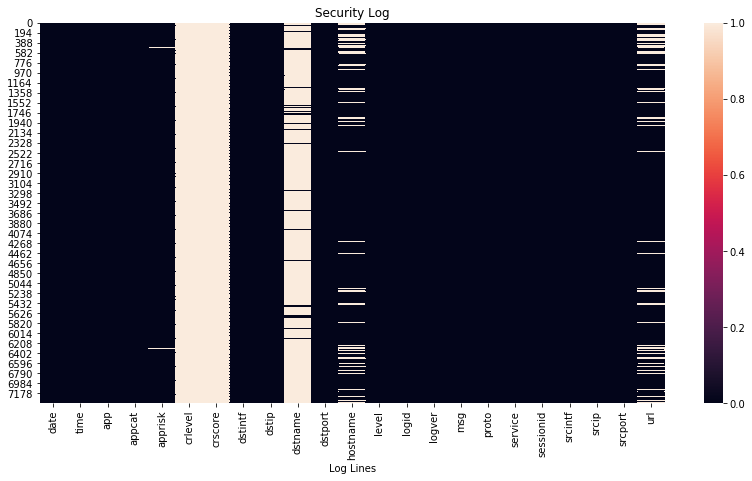

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Security Log")

# Heatmap showing 
sns.heatmap(data=df1.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [17]:
df2_suspect = df1.dropna(subset=["crlevel","crscore"], axis=0)
df2_suspect

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
1913,2019-07-10,13:36:18,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,145898,wifi-vodafone,192.168.53.2,54117,NaN
4140,2019-07-09,22:51:11,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,128249,wifi-vodafone,192.168.53.2,53597,NaN
4245,2019-07-09,21:32:53,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,126635,wifi-vodafone,192.168.53.2,53539,NaN
4452,2019-07-09,20:11:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124678,wifi-vodafone,192.168.53.2,53123,NaN
4465,2019-07-09,20:09:15,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124605,wifi-vodafone,192.168.53.2,53119,NaN
4470,2019-07-09,20:08:47,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124542,wifi-vodafone,192.168.53.2,53114,NaN
4516,2019-07-09,19:28:27,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,123821,wifi-vodafone,192.168.53.2,53106,NaN
4601,2019-07-09,18:06:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,122189,wifi-vodafone,192.168.53.2,53075,NaN
5299,2019-07-09,08:04:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,112135,wifi-vodafone,192.168.53.3,55724,NaN
5398,2019-07-09,07:52:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,111626,wifi-vodafone,192.168.53.2,52547,NaN


In [18]:
df2_suspect.sort_values(by=["date","time"], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2_suspect

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
5398,2019-07-09,07:52:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,111626,wifi-vodafone,192.168.53.2,52547,NaN
5299,2019-07-09,08:04:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,112135,wifi-vodafone,192.168.53.3,55724,NaN
4601,2019-07-09,18:06:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,122189,wifi-vodafone,192.168.53.2,53075,NaN
4516,2019-07-09,19:28:27,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,123821,wifi-vodafone,192.168.53.2,53106,NaN
4470,2019-07-09,20:08:47,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124542,wifi-vodafone,192.168.53.2,53114,NaN
4465,2019-07-09,20:09:15,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124605,wifi-vodafone,192.168.53.2,53119,NaN
4452,2019-07-09,20:11:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124678,wifi-vodafone,192.168.53.2,53123,NaN
4245,2019-07-09,21:32:53,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,126635,wifi-vodafone,192.168.53.2,53539,NaN
4140,2019-07-09,22:51:11,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,128249,wifi-vodafone,192.168.53.2,53597,NaN
1913,2019-07-10,13:36:18,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,145898,wifi-vodafone,192.168.53.2,54117,NaN


Imputation of missing values (for example:  'crlevel', 'crscore')

In [20]:
for col in ["crlevel","crscore","dstname"]:
  print(col,df1[col].dropna().unique(),len(df1[col].dropna().unique()))

crlevel ['low'] 1
crscore ['5'] 1
dstname ['mil04s27-in-f3.1e100.net' 'mil04s29-in-f195.1e100.net'
 'mil04s26-in-f99.1e100.net' 'mil04s26-in-f110.1e100.net'
 'mil04s04-in-f14.1e100.net' 'mil04s25-in-f3.1e100.net'
 'mil04s28-in-f162.1e100.net' 'mil04s29-in-f4.1e100.net' '93.184.220.29'
 'mil04s04-in-f35.1e100.net' 'mil04s27-in-f14.1e100.net'
 'mil04s27-in-f10.1e100.net' 'mil04s29-in-f206.1e100.net'
 'mil04s27-in-f4.1e100.net' 'mil04s26-in-f10.1e100.net'
 'mil04s26-in-f104.1e100.net' '13.107.4.50' 'mil04s03-in-f3.1e100.net'
 'mil04s28-in-f4.1e100.net' 'mil04s03-in-f14.1e100.net'
 'mil04s28-in-f14.1e100.net'
 'a104-83-88-10.deploy.static.akamaitechnologies.com'
 'ocsp.sc.intesasanpaolo.infocert.it' 'ws19414012241.fujitsu.es'
 '37.157.4.24' 'mil04s25-in-f78.1e100.net'
 'a95-101-180-177.deploy.static.akamaitechnologies.com'
 'defra3-vip-bx-008.aaplimg.com'
 'a88-221-111-48.deploy.static.akamaitechnologies.com' '83.224.68.148'
 'a95-101-180-176.deploy.static.akamaitechnologies.com' '83.224.6

In [21]:
for col in ["crlevel","crscore","dstname"]:
  print(col,df1[col].value_counts())

crlevel low    10
Name: crlevel, dtype: int64
crscore 5    10
Name: crscore, dtype: int64
dstname a104-83-88-10.deploy.static.akamaitechnologies.com      38
mil04s26-in-f110.1e100.net                              33
mil04s03-in-f14.1e100.net                               24
mil04s04-in-f14.1e100.net                               21
mil04s27-in-f142.1e100.net                              20
mil04s27-in-f14.1e100.net                               20
mil04s29-in-f195.1e100.net                              19
mil04s28-in-f14.1e100.net                               18
mil04s25-in-f78.1e100.net                               15
a95-101-180-177.deploy.static.akamaitechnologies.com    14
83.224.68.147                                           14
mil04s26-in-f99.1e100.net                               12
defra3-vip-bx-001.aaplimg.com                           11
mil04s04-in-f46.1e100.net                               11
93.184.220.29                                           10
mil04s25-in-f4.1e

Extract occurrences for the following columns:
- destip
- sessionid
- app
- srcip
- service
- hostname

In [22]:
for col in ["dstip","sessionid","app","srcip","service","hostname"]:
  print(col,df1[col].value_counts())

dstip 79.7.90.141        562
192.168.1.203      357
17.253.54.125      233
156.54.131.85      183
104.83.88.10       160
99.86.163.101      159
99.86.163.110      132
17.242.57.246      111
40.67.252.61       102
52.0.252.24        101
31.13.86.8          81
31.13.86.36         57
213.227.153.240     56
157.240.193.63      55
157.240.193.16      52
37.10.0.96          50
99.86.163.121       49
31.13.86.2          48
2.20.158.32         48
104.244.39.20       48
52.0.253.129        46
216.58.205.106      46
17.250.13.5         44
104.83.154.143      42
216.58.205.138      42
216.58.205.110      40
69.173.144.140      40
216.58.205.142      40
216.58.205.194      39
17.142.171.15       38
                  ... 
40.80.145.78         1
52.0.252.3           1
40.90.23.211         1
173.194.162.72       1
104.244.42.136       1
172.217.10.131       1
173.194.151.186      1
172.217.133.167      1
158.58.139.83        1
92.122.145.12        1
104.83.89.175        1
99.86.163.87         1
74.12

In [23]:
df1.index


RangeIndex(start=0, stop=7366, step=1)

Plot the different occurences

In [24]:
df1.columns

Index(['date', 'time', 'app', 'appcat', 'apprisk', 'crlevel', 'crscore',
       'dstintf', 'dstip', 'dstname', 'dstport', 'hostname', 'level', 'logid',
       'logver', 'msg', 'proto', 'service', 'sessionid', 'srcintf', 'srcip',
       'srcport', 'url'],
      dtype='object')

In [25]:

df1.values

array([['2019-07-10', '23:28:18', 'SSL_TLSv1.2', ..., '192.168.52.2',
        '60599', '/'],
       ['2019-07-10', '23:28:18', 'SSL', ..., '192.168.52.2', '60599',
        '/'],
       ['2019-07-10', '23:23:15', 'NTP', ..., '192.168.52.2', '55484',
        nan],
       ...,
       ['2019-07-06', '12:08:54', 'YouTube', ..., '192.168.52.2',
        '57875', '/'],
       ['2019-07-06', '12:08:40', 'NTP', ..., '192.168.52.2', '56642',
        nan],
       ['2019-07-06', '12:08:40', 'NTP', ..., '192.168.52.2', '59278',
        nan]], dtype=object)

In [26]:
df1[["dstip"]]

,dstip
0,17.248.146.168
1,17.248.146.168
2,17.253.54.125
3,17.248.146.168
4,17.248.146.168
5,17.248.146.168
6,79.7.90.137
7,79.7.90.137
8,192.168.1.203
9,79.7.90.137


In [27]:
 df1.iloc[3]

date                        2019-07-10
time                          23:21:15
app                             iCloud
appcat                  Storage.Backup
apprisk                         medium
crlevel                            NaN
crscore                            NaN
dstintf                           wifi
dstip                   17.248.146.168
dstname                            NaN
dstport                            443
hostname            gateway.icloud.com
level                      information
logid                            28704
logver                              52
msg          "Storage.Backup: iCloud,"
proto                                6
service                          HTTPS
sessionid                       164786
srcintf                           wan1
srcip                     192.168.52.2
srcport                          60598
url                                  /
Name: 3, dtype: object

In [28]:
# transform the dataframe in an matrix of 2 columns: dstip and the count of the dstip
df3={'dstip_count' : df1["dstip"].value_counts()}
df4 = pd.DataFrame(df3)[:20]
df4


,dstip_count
79.7.90.141,562
192.168.1.203,357
17.253.54.125,233
156.54.131.85,183
104.83.88.10,160
99.86.163.101,159
99.86.163.110,132
17.242.57.246,111
40.67.252.61,102
52.0.252.24,101


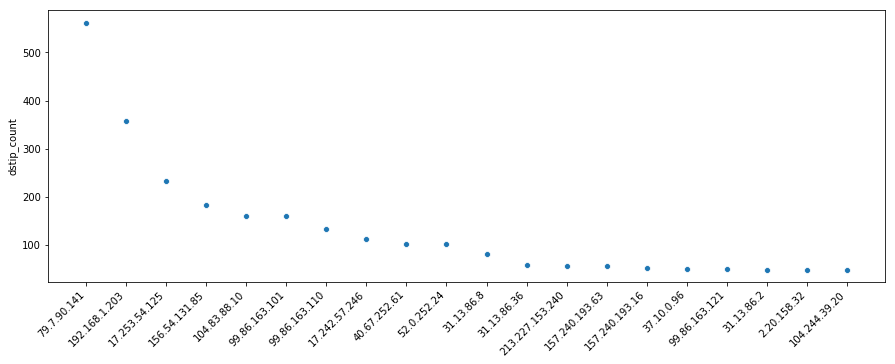

In [29]:
x4=df4.index
y4=df4["dstip_count"]
plt.figure(figsize=(15,5))
chart = sns.scatterplot(x4, y4)
#chart = sns.countplot(
#    data=data[data['Year'] == 1980],
#    x='Sport',
#    palette='Set1'
#)
#chart
#chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
#chart.set_xticklabels('ddd',rotation=45,horizontalalignment='right')
#chart.get_xticklabels()
plt.xticks(rotation=45,horizontalalignment='right');

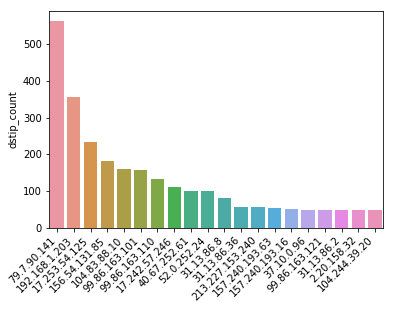

In [30]:
chart = sns.barplot(x4, y4)
plt.xticks(rotation=45,horizontalalignment='right');

In [31]:
# transform the dataframe in an matrix of 2 columns: dstip and the count of the dstip
df5={'app_count' : df1["app"].value_counts()}
df6 = pd.DataFrame(df5)[:10]
df6


,app_count
SSL,2455
SSL_TLSv1.2,2371
Viber,603
SNMP_GetRequest,271
NTP,235
YouTube,220
Facebook,190
iCloud,136
Apple.iOS.Push.Notification,131
Instagram,83


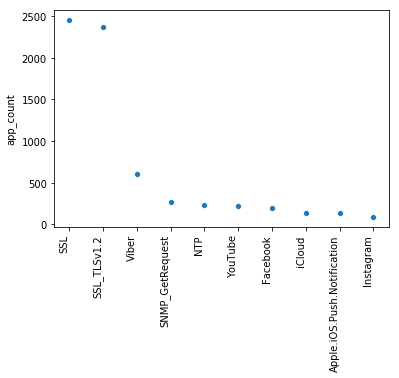

In [32]:
sns.scatterplot(x=df6.index, y=df6["app_count"])
plt.xticks(rotation=90,horizontalalignment='right');

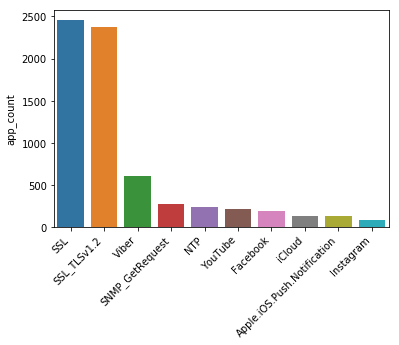

In [33]:
chart = sns.barplot(x=df6.index, y=df6["app_count"])
plt.xticks(rotation=45,horizontalalignment='right');

Extract occurrences for the following columns:

time slot (4; 0-6, 7-12, 13-18, 19-24) on "time" columns

for each time sloc compute la frequency of the single service

  x: time slot
  
  y: frequency
  
  color (label): service

In [34]:
#df['time'] = pd.to_timedelta(df['time'],unit='s')
df['time'] = pd.to_datetime(df['time'])
df['hours'] = df['time'].dt.hour
#data=df.groupby([pd.Grouper(key='time',freq='H'),'app'])['app'].agg({'freq':'count'}).reset_index()
data=df.groupby(['hours','app'])['app'].agg({'freq':'count'}).reset_index()
#data=data.pivot(index='time',columns='app',values='freq').fillna(0)
data=data.pivot(index='hours',columns='app',values='freq').fillna(0)
data.head()
#df['hours'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


app,Apple.Ipad,Apple.Iphone,Apple.Software.Update,Apple.Store,Apple.iOS.Push.Notification,BitTorrent,Facebook,Facebook_Video.Play,Google.Accounts,Google.Ads,Google.Analytics,Google.Calendar,Google.Drive,Google.Services,HTTP.Audio,HTTP.Download.Accelerator,HTTP.Segmented.Download,IMAPS,Instagram,MS.Windows.Update,Microsoft.Authentication,Microsoft.Office.Online,Microsoft.Portal,NTP,OCSP,Ping,SNMP_GetNextRequest,SNMP_GetRequest,SNMP_V1,SSL,SSL_SSLv3,SSL_TLSv1.0,SSL_TLSv1.1,SSL_TLSv1.2,Skype,Spotify,Twitter,Viber,Vkontakte,WhatsApp,YouTube,iCloud
hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,2.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
3,0.0,5.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [0]:
highest_freq_app=data.sum().sort_values(ascending=False).apply(lambda x: x if x>200 else np.nan).dropna().index

Text(0.5, 0, 'Hours')

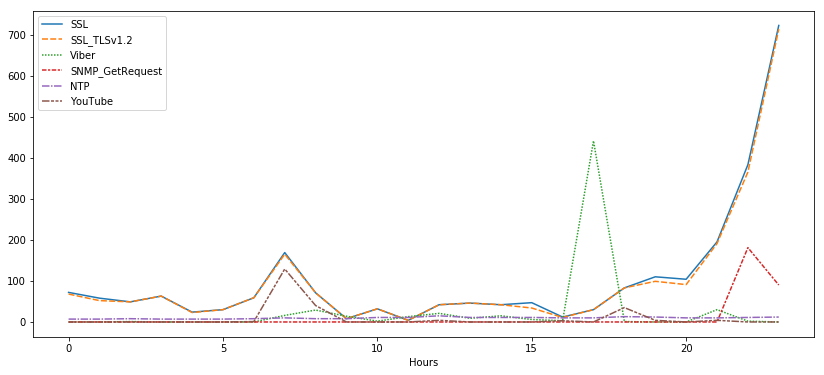

In [36]:
plt.figure(figsize=(14,6))
# at present we cannot insert more than 6 columns because we don't have enough styles (colors)
sns.lineplot(data=data.loc[:,highest_freq_app])
#sns.lineplot(data=data.iloc[:,:6])
plt.xlabel("Hours")
#plt.xticks(pd.to_datetime(data.index))

In [37]:
"""# import all the file of the TLOG in single dataframe

# The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell,
# although results are returned in arbitrary order
import glob

# set the path, filename, temporary list and a dictionary 
path = "/content"
filenames = glob.glob(path + "/FWF40C3915001580.tlog.*.gz")
dfts = []
cols_dict=dict()

# fill the dictionary and the temporary array
for sec_filepat in filenames:
  # read the cvs into dataframe
  df=pd.read_csv(sec_filepat, sep=',', header=None, compression='gzip')
  # add the column "filepath" to dataframe at the end
  df["filepath"]="filepath="+sec_filepat
  # create a dictionary using "sec_filepath" as key and <number of columns>,<list_of_columns> as values
  # lambda: funtion in line
  cols_dict[sec_filepat]=(len(df.columns), [df[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in df.columns])
  # append each dataframe to the temporary list
  dfts.append(df)

# concat: concatenate pandas objects along a particular axis with optional set logic along the other axes;
# ignore_index = True: do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1.
dft = pd.concat(dfts, ignore_index=True)
# assignt the comunm names from the first row
dft.columns = [dft[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in dft.columns]
dft = dft.applymap(lambda x: cut_string(x, char='=', pos=1))

del dfts
cols_dict"""

'# import all the file of the TLOG in single dataframe\n\n# The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell,\n# although results are returned in arbitrary order\nimport glob\n\n# set the path, filename, temporary list and a dictionary \npath = "/content"\nfilenames = glob.glob(path + "/FWF40C3915001580.tlog.*.gz")\ndfts = []\ncols_dict=dict()\n\n# fill the dictionary and the temporary array\nfor sec_filepat in filenames:\n  # read the cvs into dataframe\n  df=pd.read_csv(sec_filepat, sep=\',\', header=None, compression=\'gzip\')\n  # add the column "filepath" to dataframe at the end\n  df["filepath"]="filepath="+sec_filepat\n  # create a dictionary using "sec_filepath" as key and <number of columns>,<list_of_columns> as values\n  # lambda: funtion in line\n  cols_dict[sec_filepat]=(len(df.columns), [df[col].apply(lambda x: cut_string(x, char=\'=\', pos=0)).dropna().unique()[0] for col in df.columns])\n  # append each da

In [46]:
# import all the file of the TLOG in single dataframe

# The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell,
# although results are returned in arbitrary order
import glob

# set the path, filename, temporary list and a dictionary 
path = "/content"
#filenames = glob.glob(path + "/FWF40C3915001580.tlog.*.gz")
filenames = glob.glob(path + "/FWF40C3915001580.elog.*.gz")
dfts = []
cols_dict=dict()

# fill the dictionary and the temporary array
for sec_filepat in filenames:
  # read the cvs into dataframe
  df=pd.read_csv(sec_filepat, sep=',', header=None, compression='gzip')
  df.columns = [df[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in df.columns]
  df = df.applymap(lambda x: cut_string(x, char='=', pos=1))
  # add the column "filepath" to dataframe at the end
  df["filepath"]="filepath="+sec_filepat
  # create a dictionary using "sec_filepath" as key and <number of columns>,<list_of_columns> as values
  # lambda: funtion in line
  cols_dict[sec_filepat]=(len(df.columns), [df[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in df.columns])
  # append each dataframe to the temporary list
  dfts.append(df)

# concat: concatenate pandas objects along a particular axis with optional set logic along the other axes;
# ignore_index = True: do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1.
dft = pd.concat(dfts, ignore_index=True)
# assignt the comunm names from the first row

del dfts
cols_dict

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,25,28,42,44,46,50,51,59,65,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,24,25,28,42,46,47,48,56,62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,40,46,54,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,25,41,47,60) have mixed types. Specify dtype option on import or set low_memory=False.

{'/content/FWF40C3915001580.elog.1557032568.log.csv.gz': (67,
  ['1557032568',
   '2019-05-05',
   '07:02:44',
   'FWF40C3915001580',
   'root',
   'event',
   'system',
   '"perf-stats"',
   '6',
   '"FWF40C-WIFI0"',
   '"N/A"',
   '0',
   '0',
   '1/2',
   'e8:94:f6:3e:3e:a8',
   '1',
   '1',
   '"N/A"',
   'massimilianop',
   '"Ack"',
   '5',
   '0',
   '79.7.90.138',
   '514',
   '"AES"',
   '0',
   'date-time',
   '"N/A"',
   '"N/A"',
   '"lan"',
   '192.168.51.100',
   '604800',
   'notice',
   '312006',
   '"System performance statistics"',
   '40704',
   '52',
   'C4:73:1E:32:EC:86',
   '"TP-LINK"',
   '61',
   '"Performance statistics: average CPU: 1, memory:  61, concurrent sessions:  21, setup-rate: 0"',
   '-95',
   'no',
   '802.11n',
   '1',
   '0',
   '0',
   '300',
   '"Reserved 0"',
   '"WPA2 Personal"',
   '0',
   '-78',
   '"FWF40C3915001580"',
   '"FWF40C3915001580"',
   '"FWF40C3915001580"',
   '0.0.0.0',
   '"TIM-13005516"',
   '0',
   'N/A',
   'update',
   '101'

In [54]:
# create a dataframe where map the presence of all the columns

cols_dict2={key:value[1] for key,value in cols_dict.items()}
cols_dict2

cols_list=[]
for cols in cols_dict2.values():
  cols_list+=cols
df_revel=pd.DataFrame(index=list(cols_dict2.keys()),columns=list(set(cols_list)))

for key,values in cols_dict2.items():
  for value in values:
    df_revel.loc[key,value]=1
    
df_revel.fillna(0, inplace=True)

df_revel



,13,detected,41ade0fe-56eb-51e8-5c32-4baec42e8484,53,1560056530,snat,DNS,2019-06-23,1048576,22,16195,248,1561870938,52781,219,"""google.com""","""DNS""",2019-07-14,app-ctrl,29880,1,"""",massimilianop,17982,178648,6409,192.168.53.2,"""Error""",63128,app-ctrl-all,"""clients3.google.com""","""wan1""",direct,180,17.248.146.107,local,"""HTTP""",80,50163,"""iOS""",...,55,208.91.112.53,192.168.52.2,elevated,pass,2019-07-21,"""iOS 12.3.1""",262144,15895,07:02:06,"""/""",information,FWF40C3915001580,notice,192.168.53.4,"""Network.Service: SSL,""",59,"""iPad""",07:12:47,63378,90:e1:7b:6d:c9:30,08:e6:89:a8:a7:14,76,"""init-p01st.push.apple.com""","""Storage.Backup""","""MAXIM""",57352,192.168.50.254,c8:3c:85:40:0d:12,"""wifi-vodafone""",509,17030,60887,13384,utm,root,2019-06-09,"""default""","""Mobile: Apple.Iphone,""","""root"""
/content/FWF40C3915001580.tlog.1561870938.log.csv.gz,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
/content/FWF40C3915001580.tlog.1563685294.log.csv.gz,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
/content/FWF40C3915001580.tlog.1561266059.log.csv.gz,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
/content/FWF40C3915001580.tlog.1560661299.log.csv.gz,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1
/content/FWF40C3915001580.tlog.log.csv.gz,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
/content/FWF40C3915001580.tlog.1560056530.log.csv.gz,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1,...,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0
/content/FWF40C3915001580.tlog.1563080427.log.csv.gz,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0


Text(0.5, 42.0, 'Log Lines')

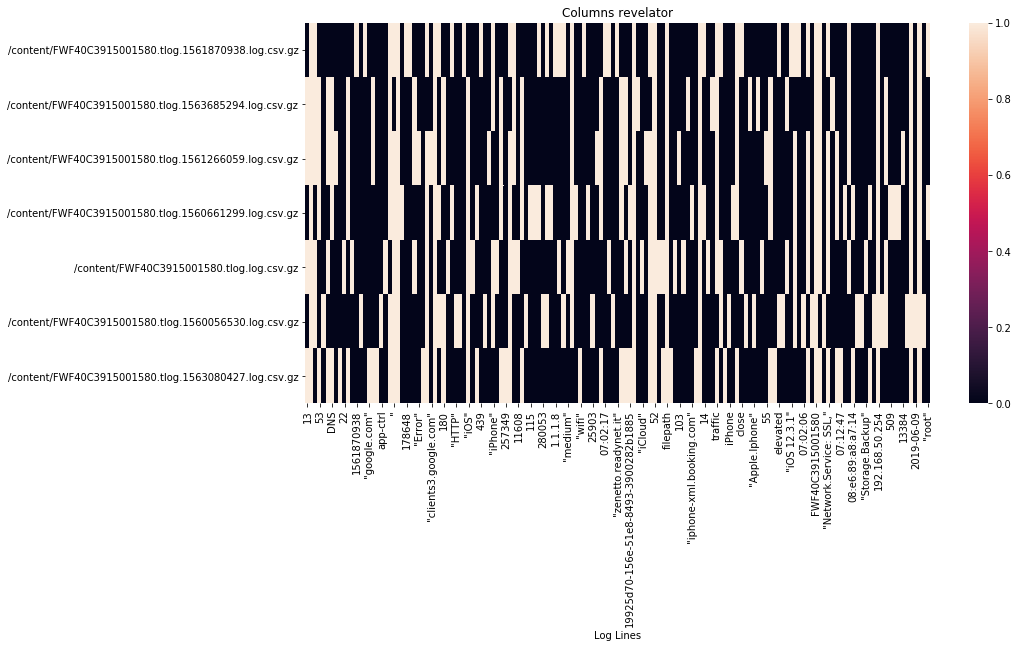

In [55]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Columns revelator")

# Heatmap showing 
sns.heatmap(data=df_revel, annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [40]:
print(len(dft))

369935


In [41]:
dft.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369935 entries, 0 to 369934
Data columns (total 59 columns):
itime           369935 non-null object
date            369934 non-null object
time            369934 non-null object
devid           369934 non-null object
vd              369934 non-null object
type            369934 non-null object
subtype         369934 non-null object
action          369934 non-null object
app             333601 non-null object
appact          142193 non-null object
appcat          275004 non-null object
appid           275004 non-null object
applist         306274 non-null object
apprisk         274340 non-null object
countapp        76049 non-null object
craction        26514 non-null object
crlevel         26616 non-null object
crscore         26879 non-null object
devname         369934 non-null object
devtype         180073 non-null object
dstcountry      232060 non-null object
dstintf         369836 non-null object
dstip           369934 non-null obj

In [42]:
dft.columns.tolist()

['itime',
 'date',
 'time',
 'devid',
 'vd',
 'type',
 'subtype',
 'action',
 'app',
 'appact',
 'appcat',
 'appid',
 'applist',
 'apprisk',
 'countapp',
 'craction',
 'crlevel',
 'crscore',
 'devname',
 'devtype',
 'dstcountry',
 'dstintf',
 'dstip',
 'dstport',
 'dstssid',
 'duration',
 'eventtype',
 'hostname',
 'level',
 'logid',
 'logver',
 'mastersrcmac',
 'msg',
 'osname',
 'osversion',
 'policyid',
 'poluuid',
 'proto',
 'rcvdbyte',
 'rcvdpkt',
 'reqtype',
 'sentbyte',
 'sentpkt',
 'service',
 'sessionid',
 'srccountry',
 'srcintf',
 'srcip',
 'srcmac',
 'srcname',
 'srcport',
 'srcssid',
 'trandisp',
 'transip',
 'transport',
 'url',
 'user',
 'utmaction',
 'filepath']

In [47]:
dft.loc[[9,16]]


,action,age,ap,apscan,apstatus,aptype,bandwidth,bssid,cfgtxpower,channel,configcountry,cpu,date,detectionmethod,devid,devname,dhcp_msg,disk,disklograte,dstip,dstport,duration,encryption,fazlograte,field,filepath,group,hostname,interface,ip,itime,lease,level,live,logdesc,logid,logver,mac,manuf,mem,meshmode,msg,new_status,noise,old_status,onwire,opercountry,opertxpower,profile,proto,radioband,radioid,radioidclosest,radioiddetected,rate,reason,security,server,setuprate,signal,sn,snclosest,sndetected,snmeshparent,srcip,ssid,stacount,stamac,status,subtype,time,total,totalsession,type,ui,used,user,vap,vd
9,"""rogue-ap-detected""",8,NaN,"""N/A""",0,0,NaN,18:0f:76:75:fd:f9,NaN,11,NaN,NaN,2019-05-12,"""N/A""",FWF40C3915001580,massimilianop,NaN,NaN,NaN,NaN,NaN,NaN,"""AES""",NaN,NaN,filepath=/content/FWF40C3915001580.elog.155763...,NaN,NaN,NaN,NaN,1557637805,NaN,notice,917206,"""Rogue AP detected""",43563,52,NaN,"""N/A""",NaN,NaN,"""AP Infostrada-75FDF8 18:0f:76:75:fd:f9 chan 1...",NaN,-95,NaN,no,NaN,NaN,NaN,NaN,802.11n,NaN,0,0,144,NaN,"""WPA2 Personal""",NaN,NaN,-84,NaN,"""FWF40C3915001580""","""FWF40C3915001580""",NaN,NaN,"""Infostrada-75FDF8""",0,N/A,NaN,wireless,07:10:07,NaN,NaN,event,NaN,NaN,NaN,NaN,root
16,"""perf-stats""",NaN,NaN,NaN,NaN,NaN,0/1,NaN,NaN,NaN,NaN,1,2019-05-12,NaN,FWF40C3915001580,massimilianop,NaN,5,0,NaN,NaN,NaN,NaN,0,NaN,filepath=/content/FWF40C3915001580.elog.155763...,NaN,NaN,NaN,NaN,1557638262,NaN,notice,NaN,"""System performance statistics""",40704,52,NaN,NaN,62,NaN,"""Performance statistics: average CPU: 1, memor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,system,07:17:43,NaN,20,event,NaN,NaN,NaN,NaN,root


In [48]:
dft.describe()

,action,age,ap,apscan,apstatus,aptype,bandwidth,bssid,cfgtxpower,channel,configcountry,cpu,date,detectionmethod,devid,devname,dhcp_msg,disk,disklograte,dstip,dstport,duration,encryption,fazlograte,field,filepath,group,hostname,interface,ip,itime,lease,level,live,logdesc,logid,logver,mac,manuf,mem,meshmode,msg,new_status,noise,old_status,onwire,opercountry,opertxpower,profile,proto,radioband,radioid,radioidclosest,radioiddetected,rate,reason,security,server,setuprate,signal,sn,snclosest,sndetected,snmeshparent,srcip,ssid,stacount,stamac,status,subtype,time,total,totalsession,type,ui,used,user,vap,vd
count,179400,148593,9353,148593,148593,148593,21873,148593,596,157338,596,21277,187595,148593,187595,187595,1957,21277,21277,121,121,3,157338,21277,14,187595,8745,1957,7267,2565,187595,1957,187595,148593,187595,187595,187595,1957,148593,21277,12,187595,1,148593,1,148593,596,596,17,1,157934,9341,148593,148593,148593,8786,157338,6,21277,148593,9365,148593,148593,12,8745,157338,148593,157338,1063,187595,187595,5310,21277,187595,28,5310,8772,8745,187595
unique,26,3913,3,1,1,2,2246,2963,2,11,1,72,76,1,1,1,1,1,1,1,1,2,4,24,1,11,1,8,3,10,94254,1,5,98272,46,46,1,9,137,12,1,146440,1,1,1,1,3,1,2,1,4,1,1,1,19,18,7,1,22,81,7,2,2,1,14,2360,1,10,8,2,45062,2,209,1,5,6,4,2,1
top,"""rogue-ap-off-air""",0,"""FWF40C-WIFI0""","""N/A""",0,0,0/1,64:59:f8:2f:5b:d8,27,6,"""US """,0,2019-06-26,"""N/A""",FWF40C3915001580,massimilianop,"""Ack""",5,0,79.7.90.138,514,312,"""AES""",0,date-time,filepath=/content/FWF40C3915001580.elog.156187...,"""N/A""","""iPhone-Anna""","""wifi-vodafone""",192.168.53.2,1557686824,604800,notice,0,"""Rogue AP off air""",43564,52,90:E1:7B:6D:C9:30,"""N/A""",62,"""non-mesh""","""DHCP statistics""","""state",-95,"""state",no,"""US """,0,"""resv-dflt-FWF40C-WIFI0""",17,802.11n,1,0,0,144,"""Reserved 0""","""WPA2 Personal""",208.91.113.206,0,-88,"""FWF40C3915001580""","""FWF40C3915001580""","""N/A""","""N/A""",0.0.0.0,"""Vodafone-33654203""",0,N/A,update,wireless,10:37:44,253,12,event,NONE,1,"""N/A""","""wifi-vodafone""",root
freq,62325,9594,8745,148593,148593,148585,5118,20175,590,41355,596,8910,3383,148593,187595,187595,1957,21277,21277,121,121,2,114861,20111,14,27254,8745,1188,3491,976,80,1957,180146,267,62325,62325,187595,1191,76762,15281,12,5310,1,148593,1,148593,572,596,12,1,138869,9341,148593,148593,70111,7627,97115,6,20754,10098,9353,145497,80989,12,2690,28107,148593,148593,886,157946,76,3540,2837,187595,14,1983,8745,7932,187595


Text(0.5, 41.09375, 'Log Lines')

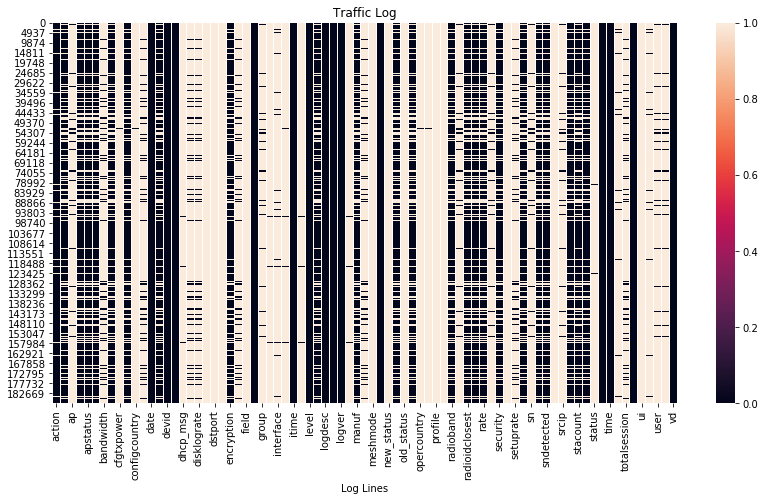

In [49]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Traffic Log")

# Heatmap showing 
sns.heatmap(data=dft.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [0]:
#dft.sort_values(["itime","sessionid"],inplace=True)
dft.sort_values(["itime"],inplace=True)

In [0]:
dft.isnull()

Text(0.5, 41.09375, 'Log Lines')

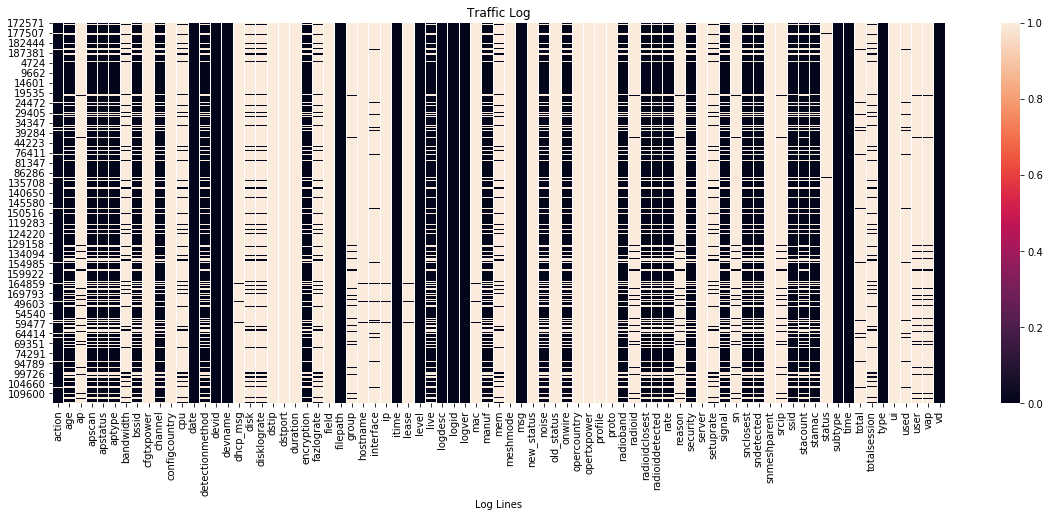

In [52]:
# Set the width and height of the figure
plt.figure(figsize=(20,7))

# Add title
plt.title("Traffic Log")

# Heatmap showing 
sns.heatmap(data=dft.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [60]:
dft.loc[dft["date"].isnull()]

,action,app,appact,appcat,appid,applist,apprisk,countapp,craction,crlevel,crscore,date,devid,devname,devtype,dstcountry,dstintf,dstip,dstport,dstssid,duration,eventtype,filepath,hostname,itime,level,logid,logver,mastersrcmac,msg,osname,osversion,policyid,poluuid,proto,rcvdbyte,rcvdpkt,reqtype,sentbyte,sentpkt,service,sessionid,srccountry,srcintf,srcip,srcmac,srcname,srcport,srcssid,subtype,time,trandisp,transip,transport,type,url,user,utmaction,vd
226356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,filepath=/content/FWF40C3915001580.tlog.156005...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# remove the rows with empty "date" and move the index to the first column creating an incremental index
dft.drop(dft.loc[dft["date"].isnull()].index,axis=0,inplace=True)
dft.reset_index(inplace=True)
len(dft)

369934

In [62]:
dft.head()

,index,action,app,appact,appcat,appid,applist,apprisk,countapp,craction,crlevel,crscore,date,devid,devname,devtype,dstcountry,dstintf,dstip,dstport,dstssid,duration,eventtype,filepath,hostname,itime,level,logid,logver,mastersrcmac,msg,osname,osversion,policyid,poluuid,proto,rcvdbyte,rcvdpkt,reqtype,sentbyte,sentpkt,service,sessionid,srccountry,srcintf,srcip,srcmac,srcname,srcport,srcssid,subtype,time,trandisp,transip,transport,type,url,user,utmaction,vd
0,193006,pass,"""Apple.Iphone""",NaN,"""Mobile""",25903,"""default""",elevated,NaN,NaN,NaN,NaN,2019-06-09,FWF40C3915001580,massimilianop,NaN,NaN,"""wan1""",92.123.180.131,80,NaN,NaN,app-ctrl-all,filepath=/content/FWF40C3915001580.tlog.156005...,"""init-p01st.push.apple.com""",1560056530,information,28704,52,NaN,"""Mobile: Apple.Iphone,""",NaN,NaN,5,NaN,6,NaN,NaN,NaN,NaN,NaN,"""HTTP""",280053,NaN,"""wifi-vodafone""",192.168.53.4,NaN,NaN,57352,NaN,app-ctrl,07:02:06,NaN,NaN,NaN,utm,"""/bag?v","""",NaN,root
1,193007,pass,"""SSL""",NaN,"""Network.Service""",15895,"""default""",elevated,NaN,NaN,NaN,NaN,2019-06-09,FWF40C3915001580,massimilianop,NaN,NaN,"""wan1""",216.58.205.74,443,NaN,NaN,app-ctrl-all,filepath=/content/FWF40C3915001580.tlog.156005...,"""safebrowsing.googleapis.com""",1560056536,information,28704,52,NaN,"""Network.Service: SSL,""",NaN,NaN,5,NaN,6,NaN,NaN,NaN,NaN,NaN,"""HTTPS""",280061,NaN,"""wifi-vodafone""",192.168.53.5,NaN,NaN,62840,NaN,app-ctrl,07:02:12,NaN,NaN,NaN,utm,"""/""","""",NaN,root
2,193008,pass,"""SSL_TLSv1.2""",NaN,"""Network.Service""",41540,"""default""",medium,NaN,NaN,NaN,NaN,2019-06-09,FWF40C3915001580,massimilianop,NaN,NaN,"""wifi-vodafone""",216.58.205.74,443,NaN,NaN,app-ctrl-all,filepath=/content/FWF40C3915001580.tlog.156005...,"""safebrowsing.googleapis.com""",1560056536,information,28704,52,NaN,"""Network.Service: SSL_TLSv1.2,""",NaN,NaN,5,NaN,6,NaN,NaN,NaN,NaN,NaN,"""HTTPS""",280061,NaN,"""wan1""",192.168.53.5,NaN,NaN,62840,NaN,app-ctrl,07:02:12,NaN,NaN,NaN,utm,"""/""","""",NaN,root
3,193009,accept,NTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-09,FWF40C3915001580,massimilianop,NaN,"""Australia""","""wan1""",1.1.1.7,123,NaN,180,NaN,filepath=/content/FWF40C3915001580.tlog.156005...,NaN,1560056538,notice,14,52,NaN,NaN,NaN,NaN,0,NaN,17,76,1,NaN,76,1,NTP,280029,"""Reserved""","""root""",192.168.50.254,NaN,NaN,123,NaN,local,07:02:16,noop,NaN,NaN,traffic,NaN,NaN,NaN,root
4,193010,accept,"""DNS""",detected,"""Network.Service""",16195,"""default""","""elevated""",NaN,NaN,NaN,NaN,2019-06-09,FWF40C3915001580,massimilianop,"""iPhone""","""Canada""","""wan1""",208.91.112.53,53,NaN,180,NaN,filepath=/content/FWF40C3915001580.tlog.156005...,NaN,1560056558,notice,13,52,c8:3c:85:40:0d:12,NaN,"""iPhone""","""iOS""",5,41ade0fe-56eb-51e8-5c32-4baec42e8484,17,113,1,NaN,59,1,DNS,280033,"""Reserved""","""wifi-vodafone""",192.168.53.4,c8:3c:85:40:0d:12,iPhone,52781,"""Vodafone-33654203""",forward,07:02:34,snat,192.168.50.254,52781,traffic,NaN,NaN,NaN,root


In [63]:
# compute the percentage of occurrence of missing values per column
for col in dft.columns:
  tmp=dft[col].isnull().sum()/len(dft)*100
  print(col,tmp)

index 0.0
action 0.0
app 9.821481669703244
appact 61.562603058924026
appcat 25.661334183935512
appid 25.661334183935512
applist 17.208475025274776
apprisk 25.84082566079355
countapp 79.44390080392719
craction 92.83412716863008
crlevel 92.8065546827272
crscore 92.73546092005601
date 0.0
devid 0.0
devname 0.0
devtype 51.32293868636027
dstcountry 37.26989138603102
dstintf 0.026491211945914674
dstip 0.0
dstport 0.12218395713830034
dstssid 99.9975671335968
duration 35.92776008693443
eventtype 64.07223991306557
filepath 0.0
hostname 68.23460401044511
itime 0.0
level 0.0
logid 0.0
logver 0.0
mastersrcmac 51.32293868636027
msg 64.07223991306557
osname 53.738234387755654
osversion 53.73877502473414
policyid 0.0
poluuid 51.76761260116669
proto 0.026491211945914674
rcvdbyte 35.90126887498851
rcvdpkt 45.214551784912985
reqtype 99.97350878805409
sentbyte 35.90126887498851
sentpkt 37.396670757486476
service 1.3421312990965957
sessionid 0.0
srccountry 37.26989138603102
srcintf 0.026491211945914674
sr

Prima competizione TVML Verona
* Obiettivo: corretto parsing del testo
* Strumenti: qualsiasi modello di machine/deep learning
* Dati: le 900.000 righe di Massimiliano
* Limitazioni: il metodo di parsing si deve basare unicamente su uno o più modelli di machine learning
* Graduatoria: basata sulle performance di parsing, sul numero di dati di training utilizzati, la velocità dell'algoritmo, la semplicità dell'algoritmi, la lunghezza del codice

Regressione logistica

Semplificazione del problema

Labelling delle righe


Ciao e tutti!
A Genova a Novembre ci sarà un evento molto grosso dedicato ad AI ed ML: https://c1a0.ai/ Come meetup DataScienceSeed siamo coinvolti nell'organizzazione in particolare in due momenti:
1 - Hackathon del 14/11 - sarà a squadre di 5-6 persone con premio in euri - si parla di 10K -  noi ci presentiamo con una squadra e forse qualche mentor
2 - Meetup straordinario la sera del 15/11 - e per questo meetup lancio ora una CALL FOR SPEAKERS a tutti i meetup di IAML -  potrebbe essere l'occasione per fare il famoso meetupo interregionale!! Per gli speakers è previsto rimborso della trasferta - Forza gente!!  Focaccia per tutti 🙂